## Real estate data cleaning with Pandas for efficient analysis
This is a real dataset that was downloaded using web scraping techniques. The data contains records from Fotocasa, one of the most popular real estate websites in Spain. Please do not perform web scraping unless it is for academic purposes.

The dataset was downloaded a few years ago by Henry Navarro, and no economic benefit was obtained from it.

It contains thousands of real house listings published on the website www.fotocasa.com. Your goal is to extract as much information as possible with the data science knowledge you have acquired so far.

Let's get started!

- First, let's read and explore the dataset.

In [38]:
# Step 0. load libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# Step 1. load data

df_raw = pd.read_csv('../real_estate.csv', sep = ';')
df_raw.sample(10)

,Unnamed: 0,id_realEstates,isNew,realEstate_name,phone_realEstate,url_inmueble,rooms,bathrooms,surface,price,...,level4Id,level5Id,level6Id,level7Id,level8Id,accuracy,latitude,longitude,zipCode,customZone
10497,10498,153958107,False,remax calidade,918005547.0,https://www.fotocasa.es/es/comprar/vivienda/sa...,NaN,NaN,22.0,199000,...,0,0,0,0,0,0,"40,42435","-3,70389",NaN,NaN
8406,8407,153971733,False,mb gestion inmobiliaria,911795627.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,85.0,175000,...,0,0,0,0,0,0,"40,28494845","-3,8060085535",NaN,NaN
5606,5607,149166697,False,look and find alcala tinte,910302631.0,https://www.fotocasa.es/es/comprar/vivienda/ca...,5.0,3.0,225.0,392500,...,0,0,0,0,0,0,"40,48421","-3,39254",NaN,NaN
8414,8415,153864012,False,monterojas,914876451.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,36.0,175000,...,0,0,0,0,0,0,"40,40142","-3,6931",NaN,NaN
13210,13211,153934790,False,bbcin,910921302.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,78.0,119000,...,0,0,0,0,0,0,"40,31837","-3,8655",NaN,NaN
376,377,153871652,False,pqcentro,912665783.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,107.0,238000,...,0,0,0,0,0,0,"40,25368","-3,69938",NaN,NaN
3954,3955,148961522,False,pryconsa,911799357.0,https://www.fotocasa.es/es/comprar/vivienda/ar...,3.0,1.0,99.0,303000,...,0,0,0,0,0,1,"40,40425","-3,60453",NaN,NaN
14546,14547,152475437,False,inmobiliaria medem,911365682.0,https://www.fotocasa.es/es/comprar/vivienda/ge...,3.0,2.0,125.0,475000,...,0,0,0,0,0,0,"40,46765","-3,67796",NaN,NaN
6206,6207,153220398,False,vivantial,911368467.0,https://www.fotocasa.es/es/comprar/vivienda/mi...,3.0,1.0,72.0,90500,...,0,0,0,0,0,0,"40,2439383","-3,7689434",NaN,NaN
2143,2144,135132394,False,pryconsa,911799013.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,NaN,NaN,57.0,245000,...,0,0,0,0,0,1,"40,5070414722878","-3,65516404270676",NaN,NaN


In [40]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15335 entries, 0 to 15334
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        15335 non-null  int64  
 1   id_realEstates    15335 non-null  int64  
 2   isNew             15335 non-null  bool   
 3   realEstate_name   15325 non-null  object 
 4   phone_realEstate  14541 non-null  float64
 5   url_inmueble      15335 non-null  object 
 6   rooms             14982 non-null  float64
 7   bathrooms         14990 non-null  float64
 8   surface           14085 non-null  float64
 9   price             15335 non-null  int64  
 10  date              15335 non-null  object 
 11  description       15193 non-null  object 
 12  address           15335 non-null  object 
 13  country           15335 non-null  object 
 14  level1            15335 non-null  object 
 15  level2            15335 non-null  object 
 16  level3            15335 non-null  object

In [41]:
#Step 2. Proceso de limpieza del DataFrame (Preprocessing)

df_baking = df_raw.copy()
df_baking = df_baking.iloc[:,1:-2] # vamos a guardar dentro de df_baking todas las [filas (:)] y las columnas desde el indice 1, hasta el -2 [1:-2]

df_baking["date"] = pd.to_datetime(df_baking["date"],errors='coerce') #Forzamos la columna "date" a ser valores tipo fecha

df_baking.columns = df_baking.columns.str.lower() # Convertimos todas las columnas string a string lower (minuscula)

#En esta linea de codico utilizamos el metodo .drop para eliminar todas las columnas de datos que no nos sirven para hacer un analisis 
#Estos datos pueden verse como muchos valores nulos o 0
df_baking = df_baking.drop(columns = ["countryid","country","level1id","level2id","level3id","level4id","level5id","level6id","level7id","level8id","accuracy"] )

#En este bloque de codigo lo que hacemos es convertir todo tipo de serie string en una categoria por defecto, permitiendo un mejor manejo de datos
#Ademas arreglamos como se ven lo datos decimales y cambiamos algunos tipos de datos string a flotante, como la latitud y longitud
df_baking["id_realestates"] = df_baking["id_realestates"].astype("category")
df_baking["phone_realestate"] = df_baking["phone_realestate"].astype("category")
df_baking["realestate_name"] = df_baking["realestate_name"].astype("category")
df_baking["url_inmueble"] = df_baking["url_inmueble"].astype("category")
df_baking["description"] = df_baking["description"].astype("category")
df_baking["address"] = df_baking["address"].astype("category")
df_baking["latitude"] = df_baking["latitude"].str.replace(",",".") #cada que encuentres una "," reemplazala por un punto "."
df_baking["latitude"] = df_baking["latitude"].astype(float)
df_baking["longitude"] = df_baking["longitude"].str.replace(",",".")#cada que encuentres una "," reemplazala por un punto "."
df_baking["longitude"] = df_baking["longitude"].astype(float)

df_baking

,id_realestates,isnew,realestate_name,phone_realestate,url_inmueble,rooms,bathrooms,surface,price,date,...,level2,level3,level4,level5,level6,level7,level8,upperlevel,latitude,longitude
0,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,2019-12-28 18:27:15.997502700+00:00,...,Madrid,Madrid Sureste - Cuenca Tajuña,"Arganda del Rey, Zona de",Arganda del Rey,NaN,Perlita,NaN,Perlita,40.294828,-3.444024
1,153867863,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,NaN,89000,2019-12-28 18:27:15.997502700+00:00,...,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,40.286740,-3.793510
2,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,2019-12-28 18:27:15.997502700+00:00,...,Madrid,Zona Noroeste,"Boadilla del Monte, Zona de",Boadilla del Monte,NaN,Sector B,NaN,Sector B,40.411565,-3.906623
3,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,2019-12-28 18:27:15.997502700+00:00,...,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,40.285379,-3.795081
4,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,2019-12-28 18:27:15.997502700+00:00,...,Madrid,Madrid Sureste - Cuenca Tajuña,"Arganda del Rey, Zona de",Arganda del Rey,NaN,Centro,NaN,Centro,40.299877,-3.452263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,NaT,...,Madrid,"Madrid, Zona de",NaN,Madrid Capital,NaN,Tetuán,Berruguete,Berruguete,40.454160,-3.702860
15331,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,NaT,...,Madrid,Madrid Sureste - Cuenca Tajuña,"Velilla de San Antonio, Zona de",Velilla de San Antonio,NaN,NaN,NaN,Velilla de San Antonio,40.366520,-3.489510
15332,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,NaT,...,Madrid,Zona Noroeste,"Torrelodones, Zona de",Torrelodones,NaN,Casco Antiguo,NaN,Casco Antiguo,40.574440,-3.921240
15333,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,NaT,...,Madrid,Madrid Sureste - Cuenca Tajuña,"Velilla de San Antonio, Zona de",Velilla de San Antonio,NaN,NaN,NaN,Velilla de San Antonio,40.369670,-3.481050


In [42]:
df_baking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15335 entries, 0 to 15334
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   id_realestates    15335 non-null  category           
 1   isnew             15335 non-null  bool               
 2   realestate_name   15325 non-null  category           
 3   phone_realestate  14541 non-null  category           
 4   url_inmueble      15335 non-null  category           
 5   rooms             14982 non-null  float64            
 6   bathrooms         14990 non-null  float64            
 7   surface           14085 non-null  float64            
 8   price             15335 non-null  int64              
 9   date              683 non-null    datetime64[ns, UTC]
 10  description       15193 non-null  category           
 11  address           15335 non-null  category           
 12  level1            15335 non-null  object             
 13  l

In [43]:
df = df_baking.copy()
df.sample( 5, random_state = 2025 )

,id_realestates,isnew,realestate_name,phone_realestate,url_inmueble,rooms,bathrooms,surface,price,date,...,level2,level3,level4,level5,level6,level7,level8,upperlevel,latitude,longitude
11956,153704529,False,habita mad,918007061.0,https://www.fotocasa.es/es/comprar/vivienda/gu...,3.0,1.0,72.0,214000,NaT,...,Madrid,"Madrid, Zona de",NaN,Madrid Capital,NaN,Hortaleza,Canillas,Canillas,40.464490,-3.632650
7285,150530836,False,desarrollo de viviendas nueva ciudad,916358709.0,https://www.fotocasa.es/vivienda/alcala-de-hen...,3.0,2.0,112.0,243800,NaT,...,Madrid,Zona Sur de Madrid,"Parla, Zona de",Parla,NaN,Centro,NaN,Centro,40.237680,-3.774230
14035,153921873,False,garsierra,912179623.0,https://www.fotocasa.es/es/comprar/vivienda/ti...,1.0,2.0,72.0,85000,NaT,...,Madrid,Corredor del Henares,"Camarma de Esteruelas, Zona de",Camarma de Esteruelas,NaN,NaN,NaN,Camarma de Esteruelas,40.550675,-3.377295
10823,150512853,False,covibarges,912175971.0,https://www.fotocasa.es/vivienda/arganda-del-r...,3.0,2.0,107.0,255000,NaT,...,Madrid,Madrid Sureste - Cuenca Tajuña,"Rivas-Vaciamadrid, Zona de",Rivas-vaciamadrid,NaN,Rivas Urbanizaciones,NaN,Rivas Urbanizaciones,40.382190,-3.530690
5778,148949209,False,urban,912780256.0,https://www.fotocasa.es/es/comprar/vivienda/pa...,4.0,4.0,NaN,439000,NaT,...,Madrid,Zona Suroeste,"Brunete, Zona de",Brunete,NaN,NaN,NaN,Brunete,40.397230,-3.998940


- Exercise 01. What is the most expensive house in the entire dataset? 

In [44]:
#Forma para buscar la casa mas cara

# casa_cara = df["price"].max()
#df[ df["price"] == casa_cara]

#df.sort_values(by = "price", ascending=False).iloc[0,:]

#Ordenamos y tomamos el primer valor de la lista 
df.sort_values(by = "price", ascending=False).head(1)

,id_realestates,isnew,realestate_name,phone_realestate,url_inmueble,rooms,bathrooms,surface,price,date,...,level2,level3,level4,level5,level6,level7,level8,upperlevel,latitude,longitude
13110,132042636,False,engel volkers torrelodones,911798512.0,https://www.fotocasa.es/es/comprar/vivienda/vi...,19.0,NaN,NaN,8500000,NaT,...,Madrid,Zona Noroeste,"El Escorial, Zona de",El Escorial,NaN,Centro - Manquilla,NaN,Centro - Manquilla,40.58308,-4.129519


- Exercise 02. What is the cheapest house in the dataset?

In [45]:
df [ df["price"] != 0].sort_values(by = "price", ascending=True)[["address","price"]].head(1)

#1-. Utilizamos condiciones dentro del filtro para tomar todos los valores distintos a 0 debido a que en el DataFrame existen viviendas que valen 0
#2-. Ordenamos con el metodo .sort_values() en forma ascendente para que en la primera posicion este el dato (En este caso la vivienda) que cueste menos
#3-. Del DataFrame tomamos [["address","price"]].head(1), decimos que tomamos el primer dato y unicamente las dos columnas "address" y "price"

,address,price
7491,"Berlin, Coslada",600


Exercise 03. What is the largest and smallest house in the dataset? 

- Print the address and area of the selected houses. For example:

- The largest house is located at Calle Gran Vía, Nº38, and its area is 5000 square meters.

- The smallest house is located at Calle Mayor, Nº12, and its area is 200 square meters.

- This exercise is similar to the previous one, but we are looking for the largest and smallest houses based on their area.

In [46]:
df[ df["surface"] >= 30 ].sort_values(by="surface", ascending=True).head(1)[["address","surface"]]

,address,surface
5081,Madrid Capital,30.0


In [47]:
df.sort_values(by="surface", ascending=False).head(1)[["address","surface"]]

,address,surface
6794,Sevilla la Nueva,249000.0


- Exercise 04. How many unique populations are in the dataset? (★☆☆)
Count the number of unique populations in the 'level5' column and print the names of the populations separated by commas. For example:

 print(populations)

population1, population2, population3, ...

In [48]:
level5_list = df["level5"].unique().tolist()
level5_count = df["level5"].nunique()

print(f"Hay {level5_count} ciudades y estas son {", ".join(level5_list)}")


Hay 168 ciudades y estas son Arganda del Rey, Fuenlabrada, Boadilla del Monte, Las Rozas de Madrid,  Madrid Capital, Villaviciosa de Odón, Pinto, Valdemoro, Navalcarnero, Pozuelo de Alarcón, Torrejón de Ardoz, Navalagamella, San Sebastián de los Reyes, Rivas-vaciamadrid, Alpedrete, Móstoles, San Fernando de Henares, Coslada, Becerril de la Sierra, Alcalá de Henares, Chinchón, Parla, Alcorcón, El Escorial, Leganés, Pedrezuela, Majadahonda, Villanueva de la Cañada, Villanueva del Pardillo, Torrelodones, Moralzarzal, Mejorada del Campo, Aranjuez, Corpa, Getafe, Velilla de San Antonio, Sevilla la Nueva, San Martín de la Vega, Villalbilla, Collado Villalba, Alcobendas, El Molar (Madrid), Moraleja de Enmedio, Algete, Campo Real, Torrejón de la Calzada, Colmenar Viejo, Valdemorillo, Fuente El Saz de Jarama, Tres Cantos, Arroyomolinos (Madrid), Griñón, Paracuellos de Jarama, Guadarrama, Titulcia, Galapagar, Collado Mediano, Los Molinos, San Lorenzo de El Escorial, Loeches, San Martín de Valdei

Exercise 05. Does the dataset contain null values (NAs)? (★☆☆)

- Print a boolean (True or False) to check if there are null values, followed by the columns that contain NAs.

In [49]:
df.isna().sum()

id_realestates          0
isnew                   0
realestate_name        10
phone_realestate      794
url_inmueble            0
rooms                 353
bathrooms             345
surface              1250
price                   0
date                14652
description           142
address                 0
level1                  0
level2                  0
level3                  0
level4               6643
level5                  0
level6              14627
level7               2277
level8               8579
upperlevel              0
latitude                0
longitude               0
dtype: int64

Exercise 06. Remove the null values (NAs) from the dataset, if applicable (★★☆)
- After removing the null values, compare the size of the DataFrame before and after the removal.

In [50]:
df.dropna(subset = ["surface"])

,id_realestates,isnew,realestate_name,phone_realestate,url_inmueble,rooms,bathrooms,surface,price,date,...,level2,level3,level4,level5,level6,level7,level8,upperlevel,latitude,longitude
0,153771986,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,103.0,195000,2019-12-28 18:27:15.997502700+00:00,...,Madrid,Madrid Sureste - Cuenca Tajuña,"Arganda del Rey, Zona de",Arganda del Rey,NaN,Perlita,NaN,Perlita,40.294828,-3.444024
2,153430440,False,look find boadilla,916350408.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,99.0,390000,2019-12-28 18:27:15.997502700+00:00,...,Madrid,Zona Noroeste,"Boadilla del Monte, Zona de",Boadilla del Monte,NaN,Sector B,NaN,Sector B,40.411565,-3.906623
3,152776331,False,tecnocasa fuenlabrada ferrocarril,916358736.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,86.0,89000,2019-12-28 18:27:15.997502700+00:00,...,Madrid,Zona Sur de Madrid,"Fuenlabrada, Zona de",Fuenlabrada,NaN,Centro,NaN,Centro,40.285379,-3.795081
4,153180188,False,ferrari 57 inmobiliaria,912177526.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,2.0,106.0,172000,2019-12-28 18:27:15.997502700+00:00,...,Madrid,Madrid Sureste - Cuenca Tajuña,"Arganda del Rey, Zona de",Arganda del Rey,NaN,Centro,NaN,Centro,40.299877,-3.452263
5,153934794,False,expimad,912780412.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,70.0,315000,2019-12-28 18:27:15.968054700+00:00,...,Madrid,Zona Noroeste,"Las Rozas de Madrid, Zona de",Las Rozas de Madrid,NaN,El Pinar - Punta Galea,NaN,El Pinar - Punta Galea,40.533910,-3.894450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15330,153901377,False,infocasa consulting,911360461.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,2.0,1.0,96.0,259470,NaT,...,Madrid,"Madrid, Zona de",NaN,Madrid Capital,NaN,Tetuán,Berruguete,Berruguete,40.454160,-3.702860
15331,150394373,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,1.0,150.0,165000,NaT,...,Madrid,Madrid Sureste - Cuenca Tajuña,"Velilla de San Antonio, Zona de",Velilla de San Antonio,NaN,NaN,NaN,Velilla de San Antonio,40.366520,-3.489510
15332,153901397,False,tecnocasa torrelodones,912780348.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,4.0,2.0,175.0,495000,NaT,...,Madrid,Zona Noroeste,"Torrelodones, Zona de",Torrelodones,NaN,Casco Antiguo,NaN,Casco Antiguo,40.574440,-3.921240
15333,152607440,False,inmobiliaria pulpon,912788039.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,3.0,2.0,101.0,195000,NaT,...,Madrid,Madrid Sureste - Cuenca Tajuña,"Velilla de San Antonio, Zona de",Velilla de San Antonio,NaN,NaN,NaN,Velilla de San Antonio,40.369670,-3.481050


Exercise 07. What is the average price in the population of "Arroyomolinos (Madrid)"? (★★☆)
- Print the value obtained from the 'level5' column.

In [51]:
precio_medio = df[ df["level5"] == "Arroyomolinos (Madrid)"]["price"].mean()
print(f"El precio medio en Arroyosmolinos (Madrid) es de {precio_medio:.1f}")
print(f"El precio medio en Arroyosmolinos (Madrid) es de {round(precio_medio,2)}$")

El precio medio en Arroyosmolinos (Madrid) es de 294541.6
El precio medio en Arroyosmolinos (Madrid) es de 294541.6$


Exercise 08. Plot the histogram of prices for the population of "Arroyomolinos (Madrid)" and explain what you observe (★★☆)
- Print the histogram of the prices and write a brief analysis of the plot in the Markdown cell.

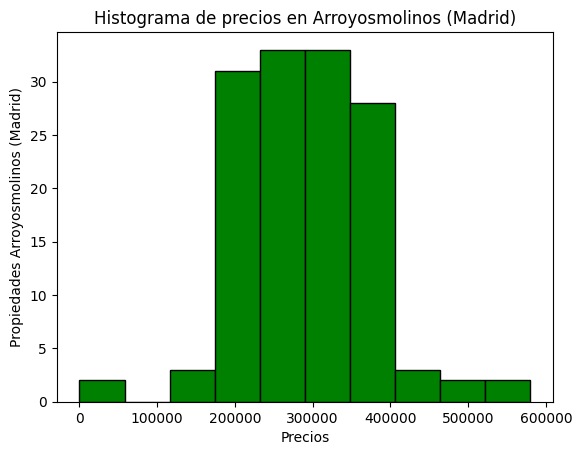

In [52]:
precio_medio = df[ df["level5"] == "Arroyomolinos (Madrid)" ]["price"]

plt.title("Histograma de precios en Arroyosmolinos (Madrid)")
plt.hist(precio_medio, alpha = 1, edgecolor='black', color="green")
plt.xlabel("Precios")
plt.ylabel("Propiedades Arroyosmolinos (Madrid)")
plt.show()


Exercise 10. Are the average prices per square meter (price/m2) of "Valdemorillo" and "Galapagar" the same? (★★☆)
- Print both average prices and then write a conclusion about it.

- Hint: Create a new column called pps (price per square meter) and then analyze the values.

In [53]:
city1= "Valdemorillo"
city2= "Galapagar"
pps_valdemorillo = df.assign(price_per_area = df["price"]/df["surface"]).query("level5==@city1")["price_per_area"].mean()
pps_galapagar = df.assign(price_per_area = df["price"]/df["surface"]).query("level5==@city2")["price_per_area"].mean()

if pps_valdemorillo == pps_galapagar:
    print(f"El precio promedio de Valdemorillo y Galapagar son iguales")
    print(f"Valdemorillo: {pps_valdemorillo:.2f}$")
    print(f"Galapagar: {pps_galapagar:.2f}$")
else:
    print(f"El precio promedio de Valdemorillo y Galapagar son distintos")
    print(f"Valdemorillo: {pps_valdemorillo:.2f}$")
    print(f"Galapagar: {pps_galapagar:.2f}$")

El precio promedio de Valdemorillo y Galapagar son distintos
Valdemorillo: 1317.95$
Galapagar: 1606.32$


Exercise 11. Analyze the relation between the surface and the price of the houses (★★☆)
- Hint: You can make a scatter plot, then write a conclusion about it.

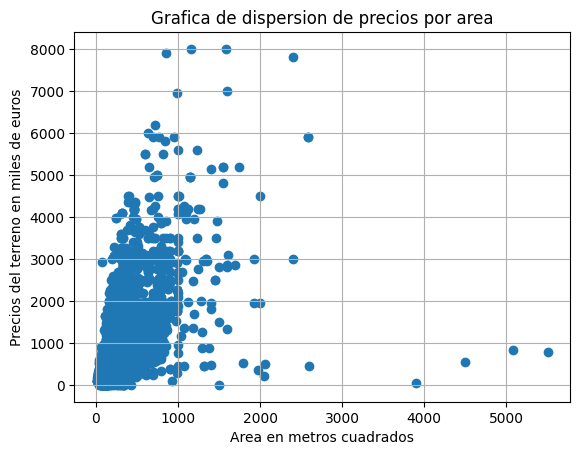

In [60]:
plt.scatter(df[df["surface"] < 10000]["surface"],df[df["surface"]< 10000]["price"]/ 1000)

plt.title("Grafica de dispersion de precios por area")
plt.ylabel("Precios del terreno en miles de euros")
plt.xlabel("Area en metros cuadrados")
plt.grid(True)
plt.show()

Exercise 13. Which is the population (level5 column) that contains the most houses? (★★☆)
- Print both the population and the number of houses.

In [80]:
df.groupby(by="level5").size().sort_values(ascending=False)

level5
 Madrid Capital         6643
Alcalá de Henares        525
Las Rozas de Madrid      383
Móstoles                 325
Getafe                   290
                        ... 
Montejo de la Sierra       1
Lozoya                     1
Pinilla del Valle          1
Rascafría                  1
Piñuécar-gandullas         1
Length: 168, dtype: int64